In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('heart_disease.xlsx')
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping             normal    4  
904     120   True      3.0         flat             normal    4  
905     123   True      2.5  downsloping  reversable defect    4  
906     105   TURE      NaN  downsloping  reversable defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

In [3]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

## The dataset is about various medical parameters of individuals and their condition with regards to heart disease. ##
## There are 13 columns, 12 features and 1 target column. num column shows the heart disease status. ##
## 0 shows no heart disease and 1,2,3,4 indicates stages of heart disease with increasing risk respectively. ##

In [5]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
exang       0.000000
oldpeak     6.828194
slope       0.000000
thal        0.000000
num         0.000000
dtype: float64

## There are 6.82% null values in oldpeak column which is more than 5 %. ##

<Axes: >

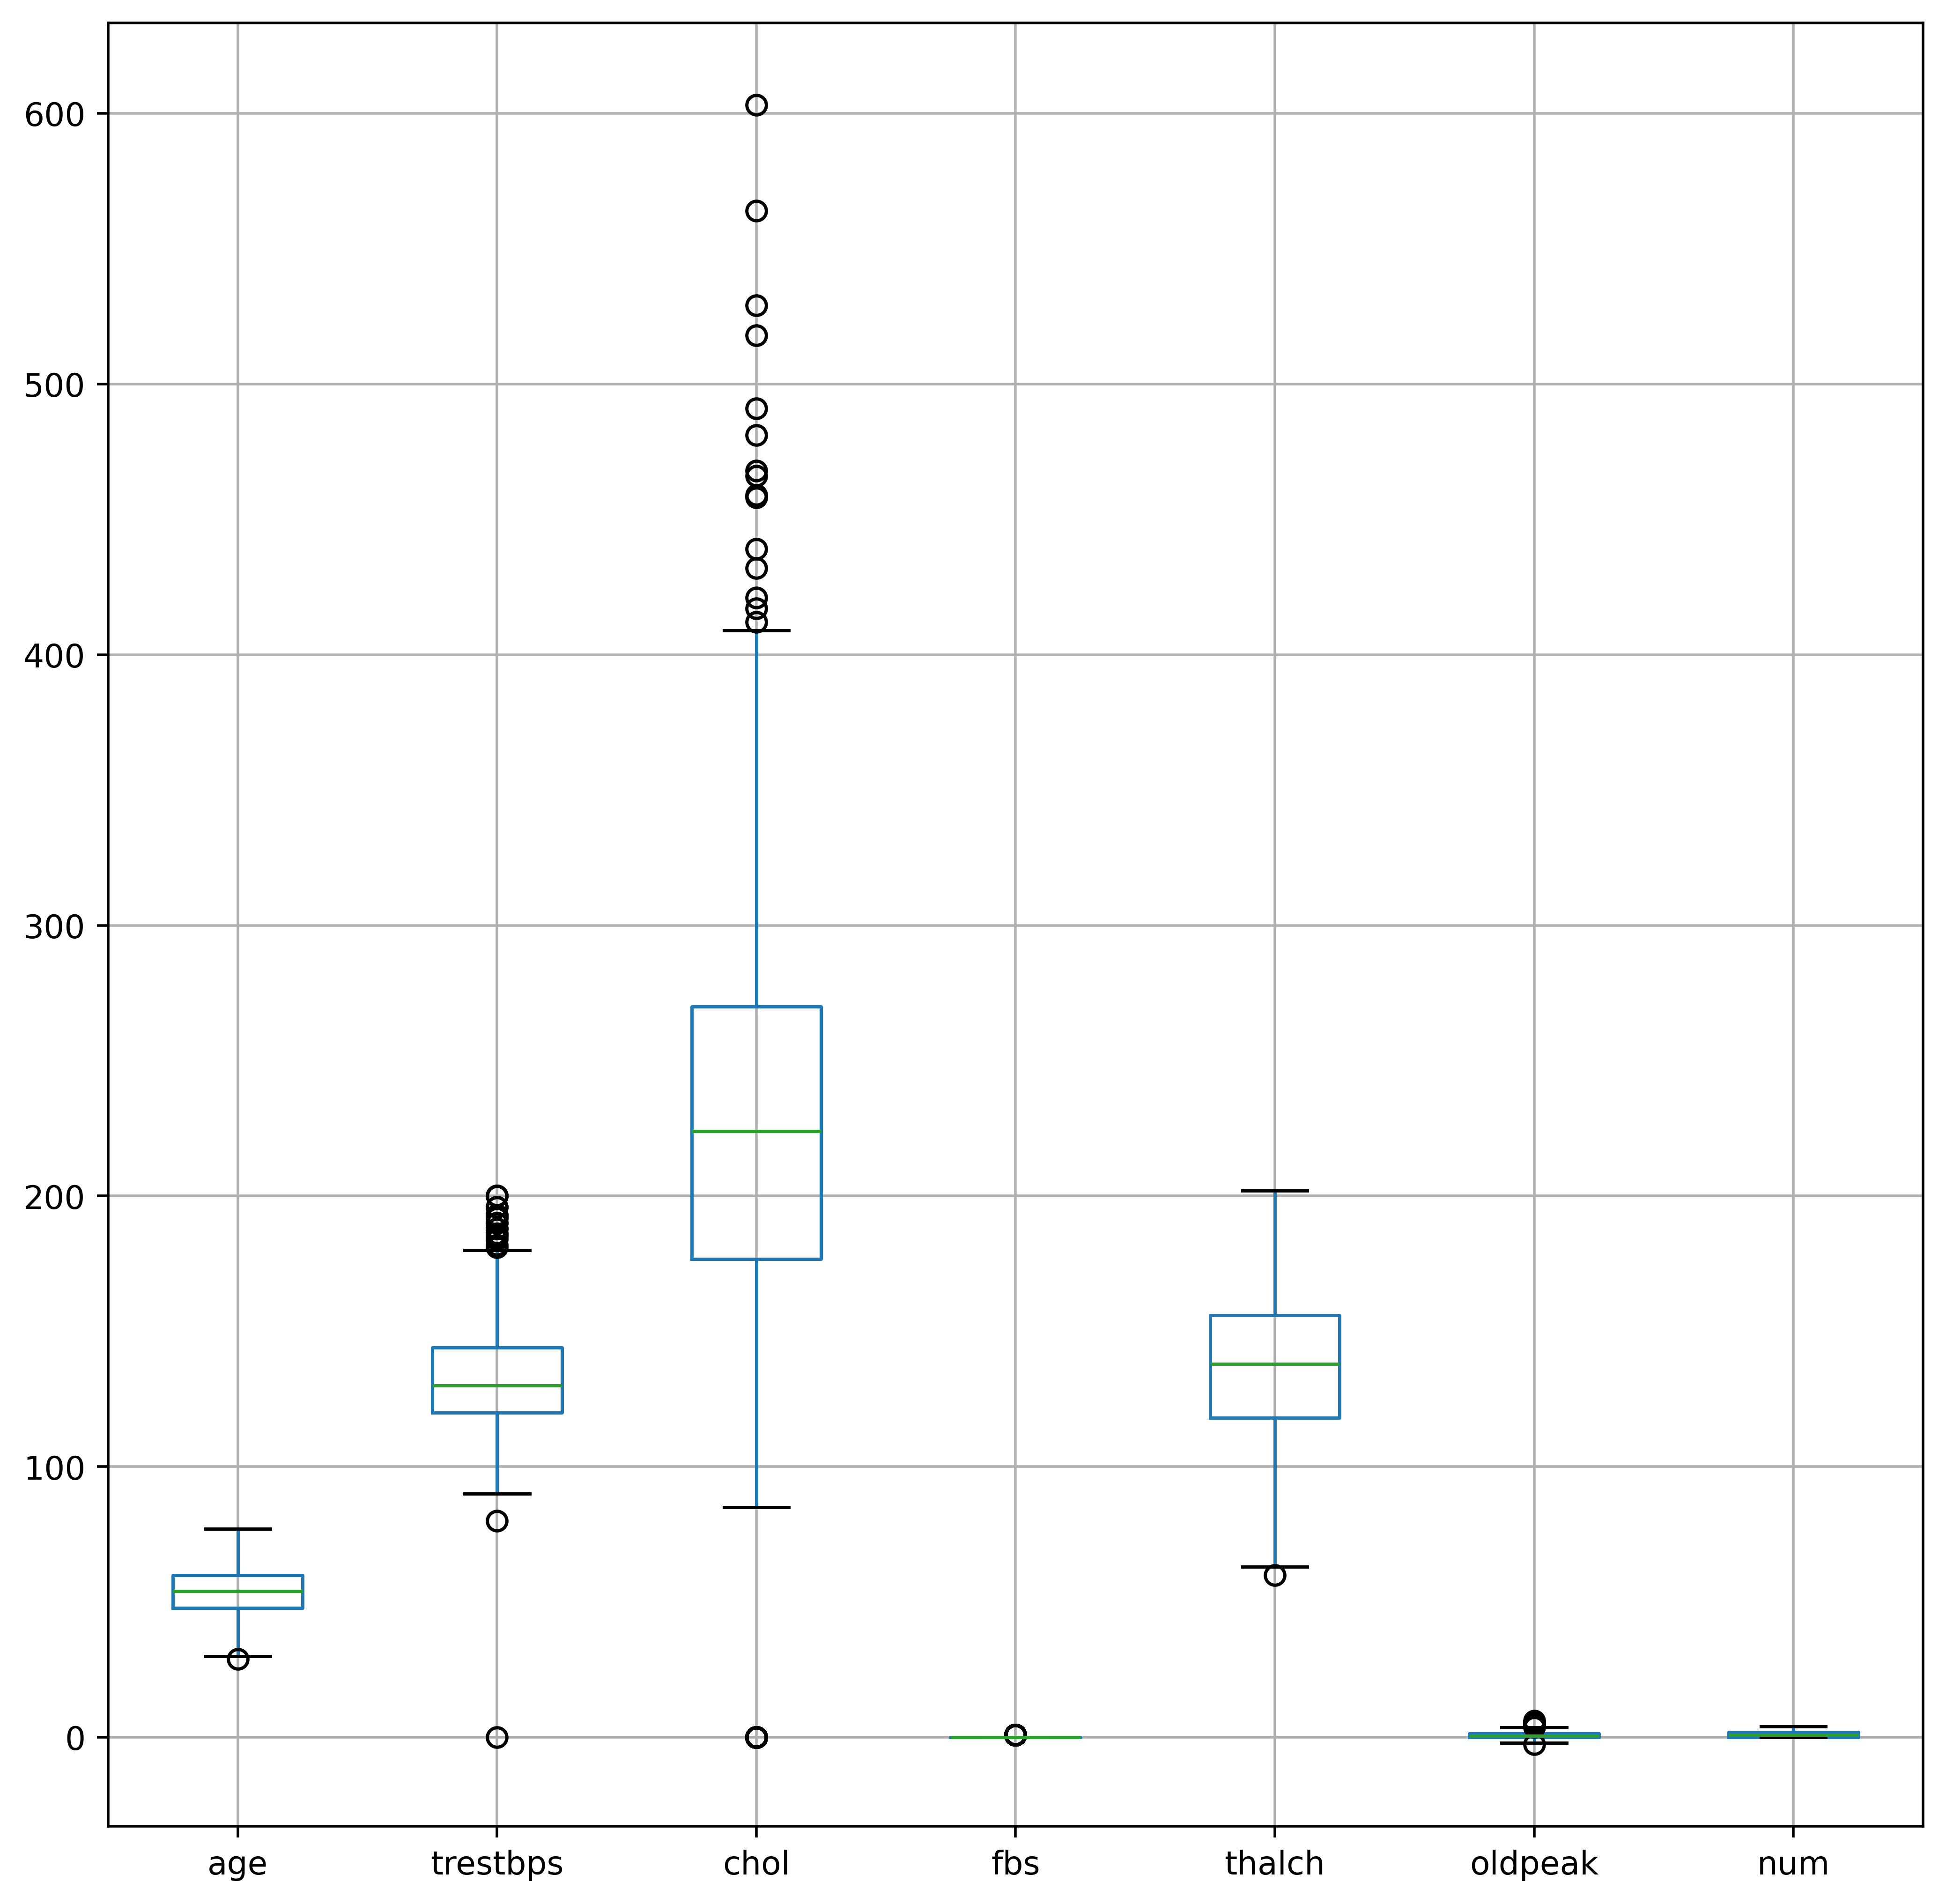

In [9]:
df.boxplot()

## There are outliers in all the columns hence I will use the median to replace the null values in oldpeak column ##

In [11]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [14]:
sns.pairplot(df)

<Axes: >

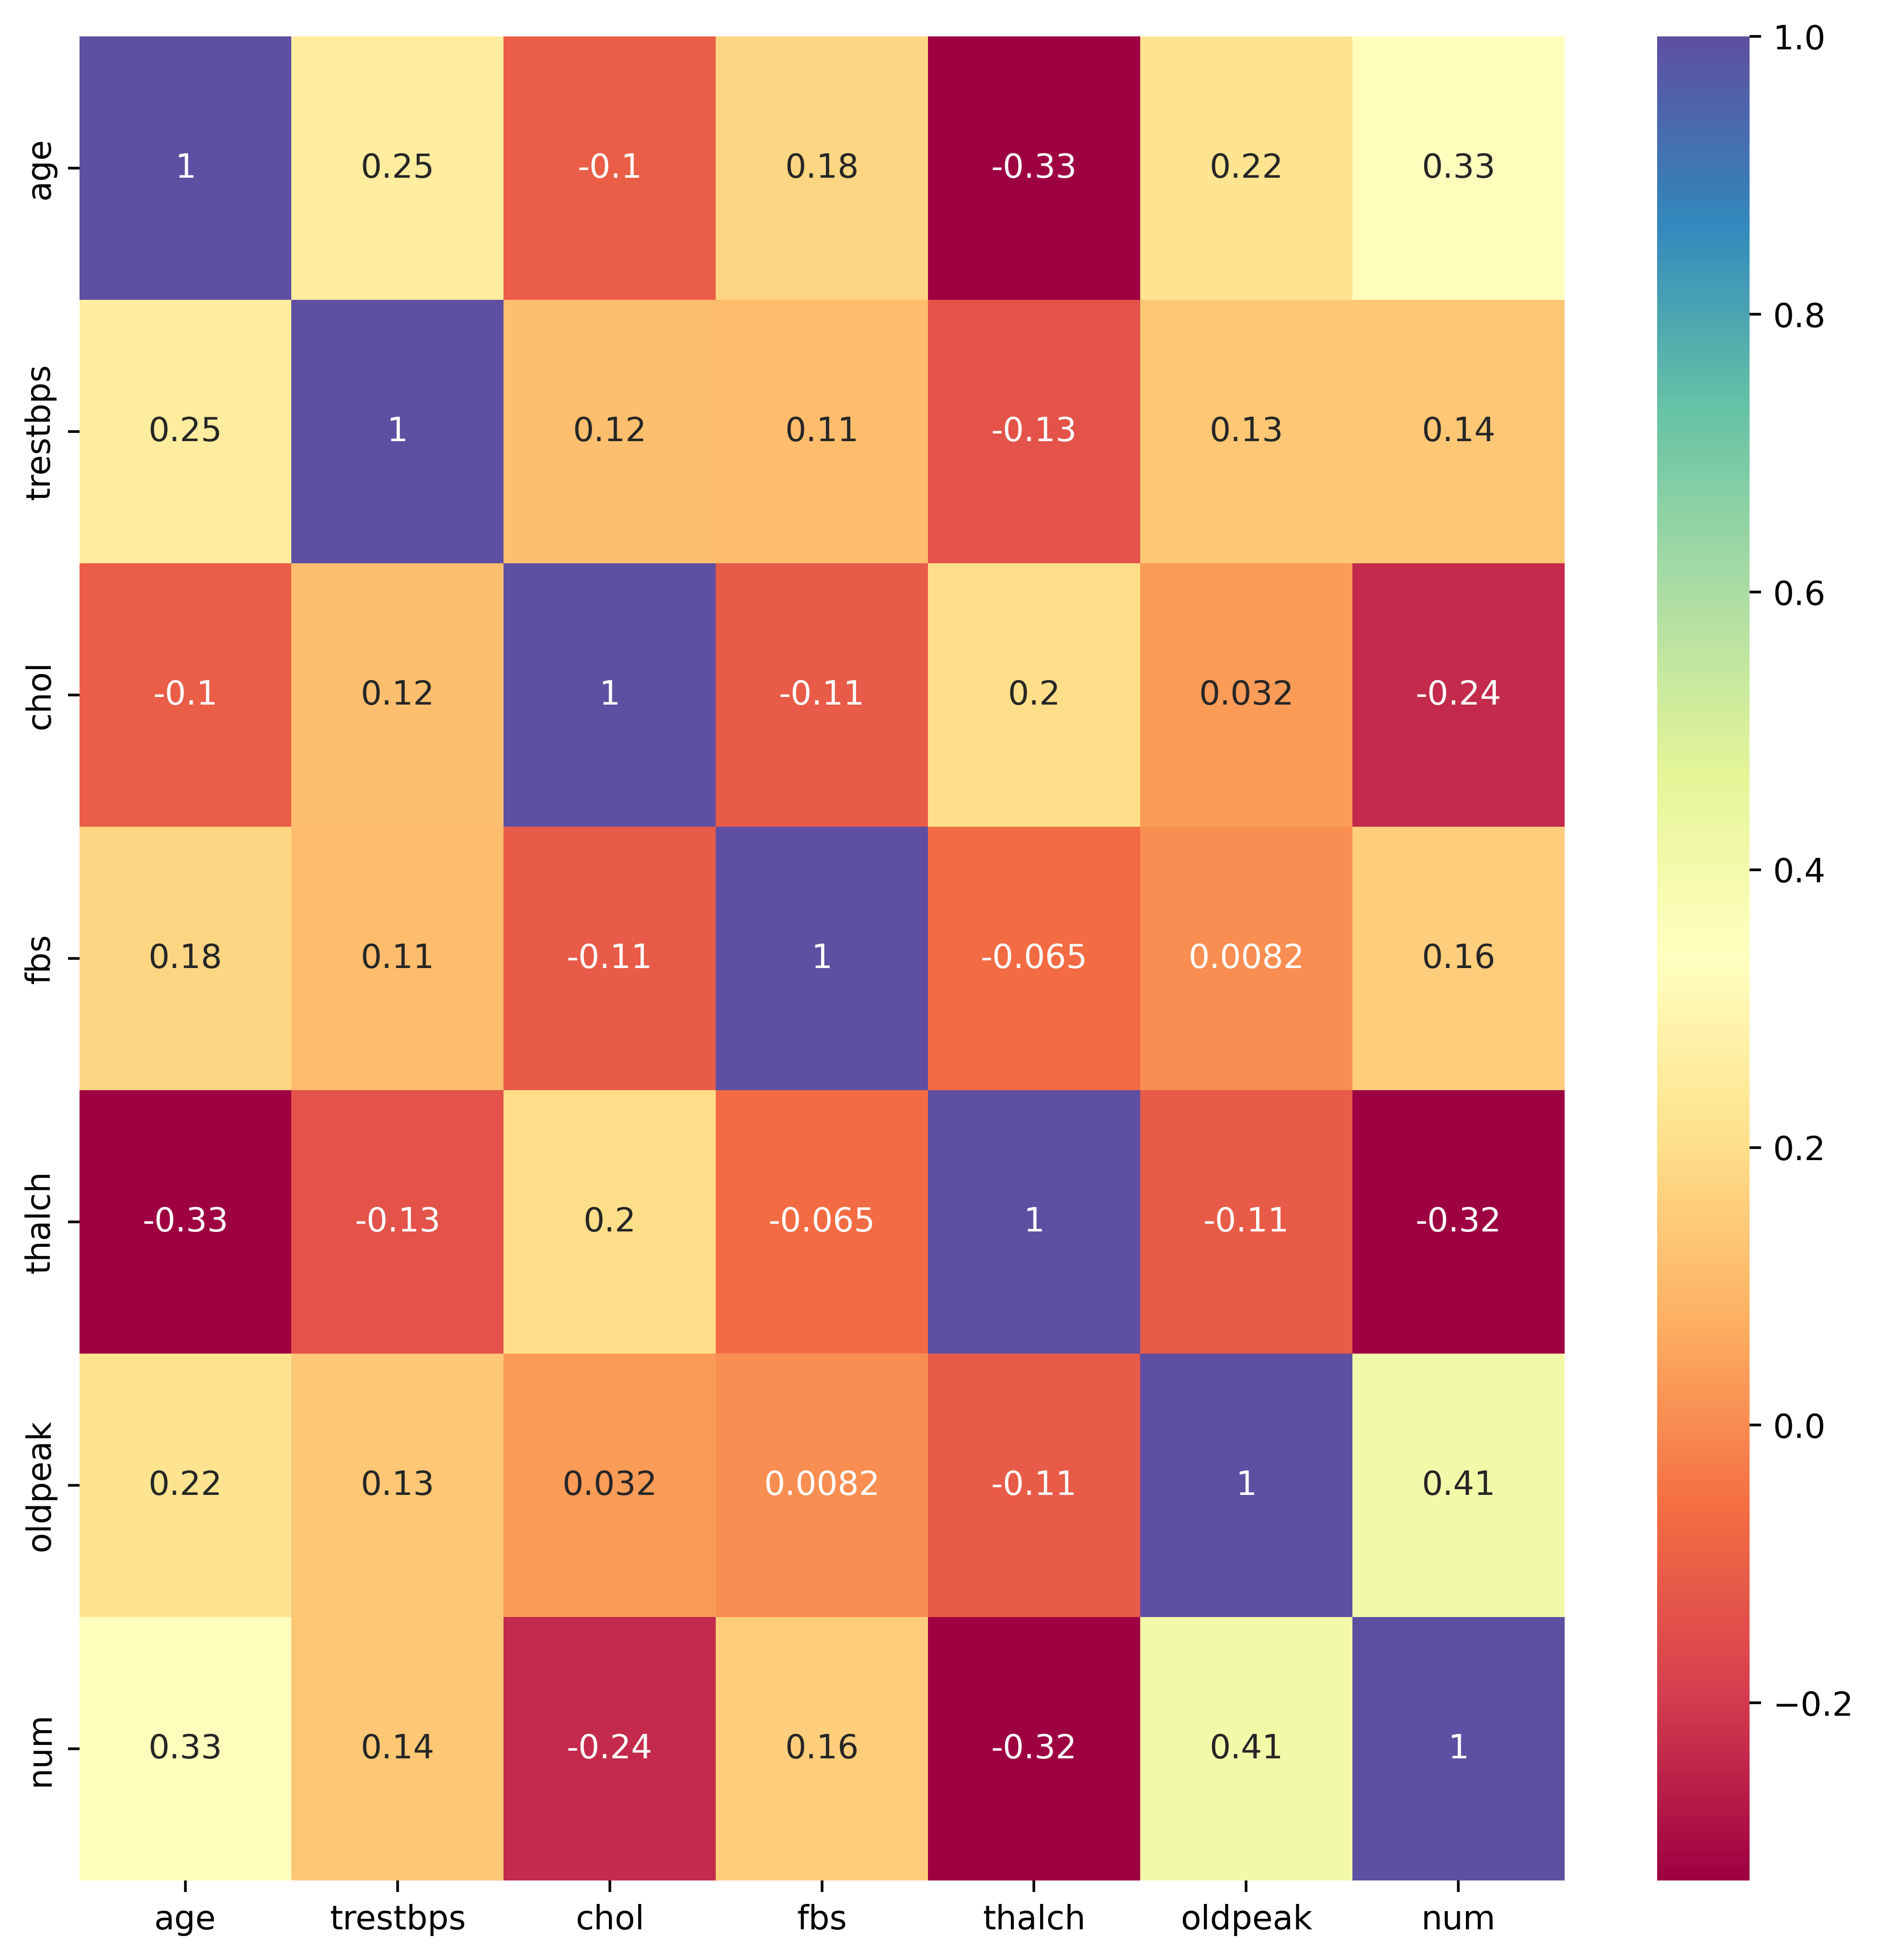

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='Spectral')

In [16]:
df['fbs'] = df['fbs'].astype(int)

In [17]:
df

age   sex               cp  trestbps  chol  fbs           restecg  \
0     63  Male   typical angina       145   233    1    lv hypertrophy   
1     41  Male  atypical angina       135   203    0            normal   
2     57  Male     asymptomatic       140   192    0            normal   
3     52  Male   typical angina       118   186    0    lv hypertrophy   
4     57  Male     asymptomatic       110   201    0            normal   
..   ...   ...              ...       ...   ...  ...               ...   
903   53  Male     asymptomatic       125     0    0            normal   
904   62  Male     asymptomatic       166   170    0  st-t abnormality   
905   56  Male      non-anginal       170     0    0    lv hypertrophy   
906   56  Male      non-anginal       144   208    1  st-t abnormality   
907   57  Male     asymptomatic       142   277    1  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping             normal    4  
904     120   True      3.0         flat             normal    4  
905     123   True      2.5  downsloping  reversable defect    4  
906     105   TURE      0.5  downsloping  reversable defect    4  
907     182  FALSE      0.5         flat  reversable defect    4  

[908 rows x 13 columns]

In [18]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [19]:
df['exang'] = df['exang'].replace('TURE','True')

In [20]:
df['exang'] = df['exang'].replace('FALSE','False')

In [21]:
df['exang'] = df['exang'].astype(bool)

## the exang column had different values resulting out of data entry errors which are now corrected. ##

In [23]:
df['exang'] = df['exang'].astype(int)

In [24]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang         int32
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [25]:
df

age   sex               cp  trestbps  chol  fbs           restecg  \
0     63  Male   typical angina       145   233    1    lv hypertrophy   
1     41  Male  atypical angina       135   203    0            normal   
2     57  Male     asymptomatic       140   192    0            normal   
3     52  Male   typical angina       118   186    0    lv hypertrophy   
4     57  Male     asymptomatic       110   201    0            normal   
..   ...   ...              ...       ...   ...  ...               ...   
903   53  Male     asymptomatic       125     0    0            normal   
904   62  Male     asymptomatic       166   170    0  st-t abnormality   
905   56  Male      non-anginal       170     0    0    lv hypertrophy   
906   56  Male      non-anginal       144   208    1  st-t abnormality   
907   57  Male     asymptomatic       142   277    1  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150      0      2.3  downsloping       fixed defect    0  
1       132      0      0.0         flat       fixed defect    0  
2       148      0      0.4         flat       fixed defect    0  
3       190      0      0.0         flat       fixed defect    0  
4       126      1      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120      0      1.5    upsloping             normal    4  
904     120      1      3.0         flat             normal    4  
905     123      1      2.5  downsloping  reversable defect    4  
906     105      1      0.5  downsloping  reversable defect    4  
907     182      1      0.5         flat  reversable defect    4  

[908 rows x 13 columns]

## There are 5 categorical columns which needs to be encoded so that algorithm can understand the columns ##
## I will use LabelEncoder to encode the categorical columns. ##

In [27]:
encoder = LabelEncoder()

In [28]:
categorical_columns = ["sex", "cp", "restecg", "slope", "thal"]

In [29]:
# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [30]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   
906   56    1   2       144   208    1        2     105      1      0.5   
907   57    1   0       142   277    1        2     182      1      0.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3        1     0    0  
4        1     0    0  
..     ...   ...  ...  
903      2     1    4  
904      1     1    4  
905      0     2    4  
906      0     2    4  
907      1     2    4  

[908 rows x 13 columns]

## Splitting the dataset in to features and target column ##

In [32]:
x = df.iloc[:,:-1]
y = df['num']

## Scaling the data using StandardScaler ##

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
x = sc.fit_transform(x)
x

array([[ 1.00602683,  0.51441613,  2.32027607, ...,  1.35440293,
        -1.6727697 , -1.49105145],
       [-1.39756029,  0.51441613,  0.23225756, ..., -0.81571758,
        -0.22484321, -1.49105145],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.43830532,
        -0.22484321, -1.49105145],
       ...,
       [ 0.24124911,  0.51441613,  1.27626682, ...,  1.54310906,
        -1.6727697 ,  1.09021589],
       [ 0.24124911,  0.51441613,  1.27626682, ..., -0.34395225,
        -1.6727697 ,  1.09021589],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.34395225,
        -0.22484321,  1.09021589]])

## Splitting the dataset further in to training and testing using train test split. 80/20 ratio ##

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

## Model Building ##

In [40]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 3, 2, 0, 1, 0, 0, 4, 0,
       1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 1, 0, 2, 3, 2, 1, 1, 0, 0, 0, 2, 0, 0, 4, 1, 3,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 4, 2, 3, 2, 0, 2, 3, 0, 2, 2, 0, 2,
       1, 3, 3, 0, 0, 1, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 0,
       1, 3, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2,
       2, 2, 0, 2, 3, 0, 1, 0, 1, 1, 2, 1, 1, 4, 1, 3, 3, 0, 2, 3, 0, 1,
       0, 1, 1, 3, 0, 1, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 1], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62        81
           1       0.36      0.33      0.34        52
           2       0.21      0.32      0.25        19
           3       0.17      0.12      0.14        25
           4       0.20      0.20      0.20         5

    accuracy                           0.43       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.43      0.43      0.43       182



In [43]:
dt.score(xtrain,ytrain)

1.0

In [44]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.42857142857142855


## from the above we can see that the accuracy is very low and there is huge difference between the training and testing accuracy. ##
## we need to do hyperparameter tuning to improve the accuracy. ##

In [45]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

 ## hyperparameter tuning using GridSearchCV ##

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [3,4,6,8],
    'splitter' :['best','random'],
    'min_samples_split' : [2,5,10]
}

In [48]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=2, cv=5)

In [49]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [50]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [85]:
dtc = DecisionTreeClassifier(criterion='gini',
                           max_depth=3,min_samples_split=2,splitter='random')

In [87]:
dtc.fit(xtrain,ytrain)
ypred  = dtc.predict(xtest)

In [89]:
dtc.score(xtrain,ytrain),dtc.score(xtest,ytest)

(0.5798898071625345, 0.5384615384615384)

## after trying many combinations of the hyperparameters, I have come up with the above combination. ##
## the efficiency is increased and the difference between the training and testing accuracy is reduced significantly. ##
## still there is lot of scope for improvement in the accuracy. ##
## since this data is related to medical parameters, whether we can remove the outliers or not is a domain specific question. ##
## removal of outliers may imporove the efficiency. ##

## visualisation of the decision tree ## 

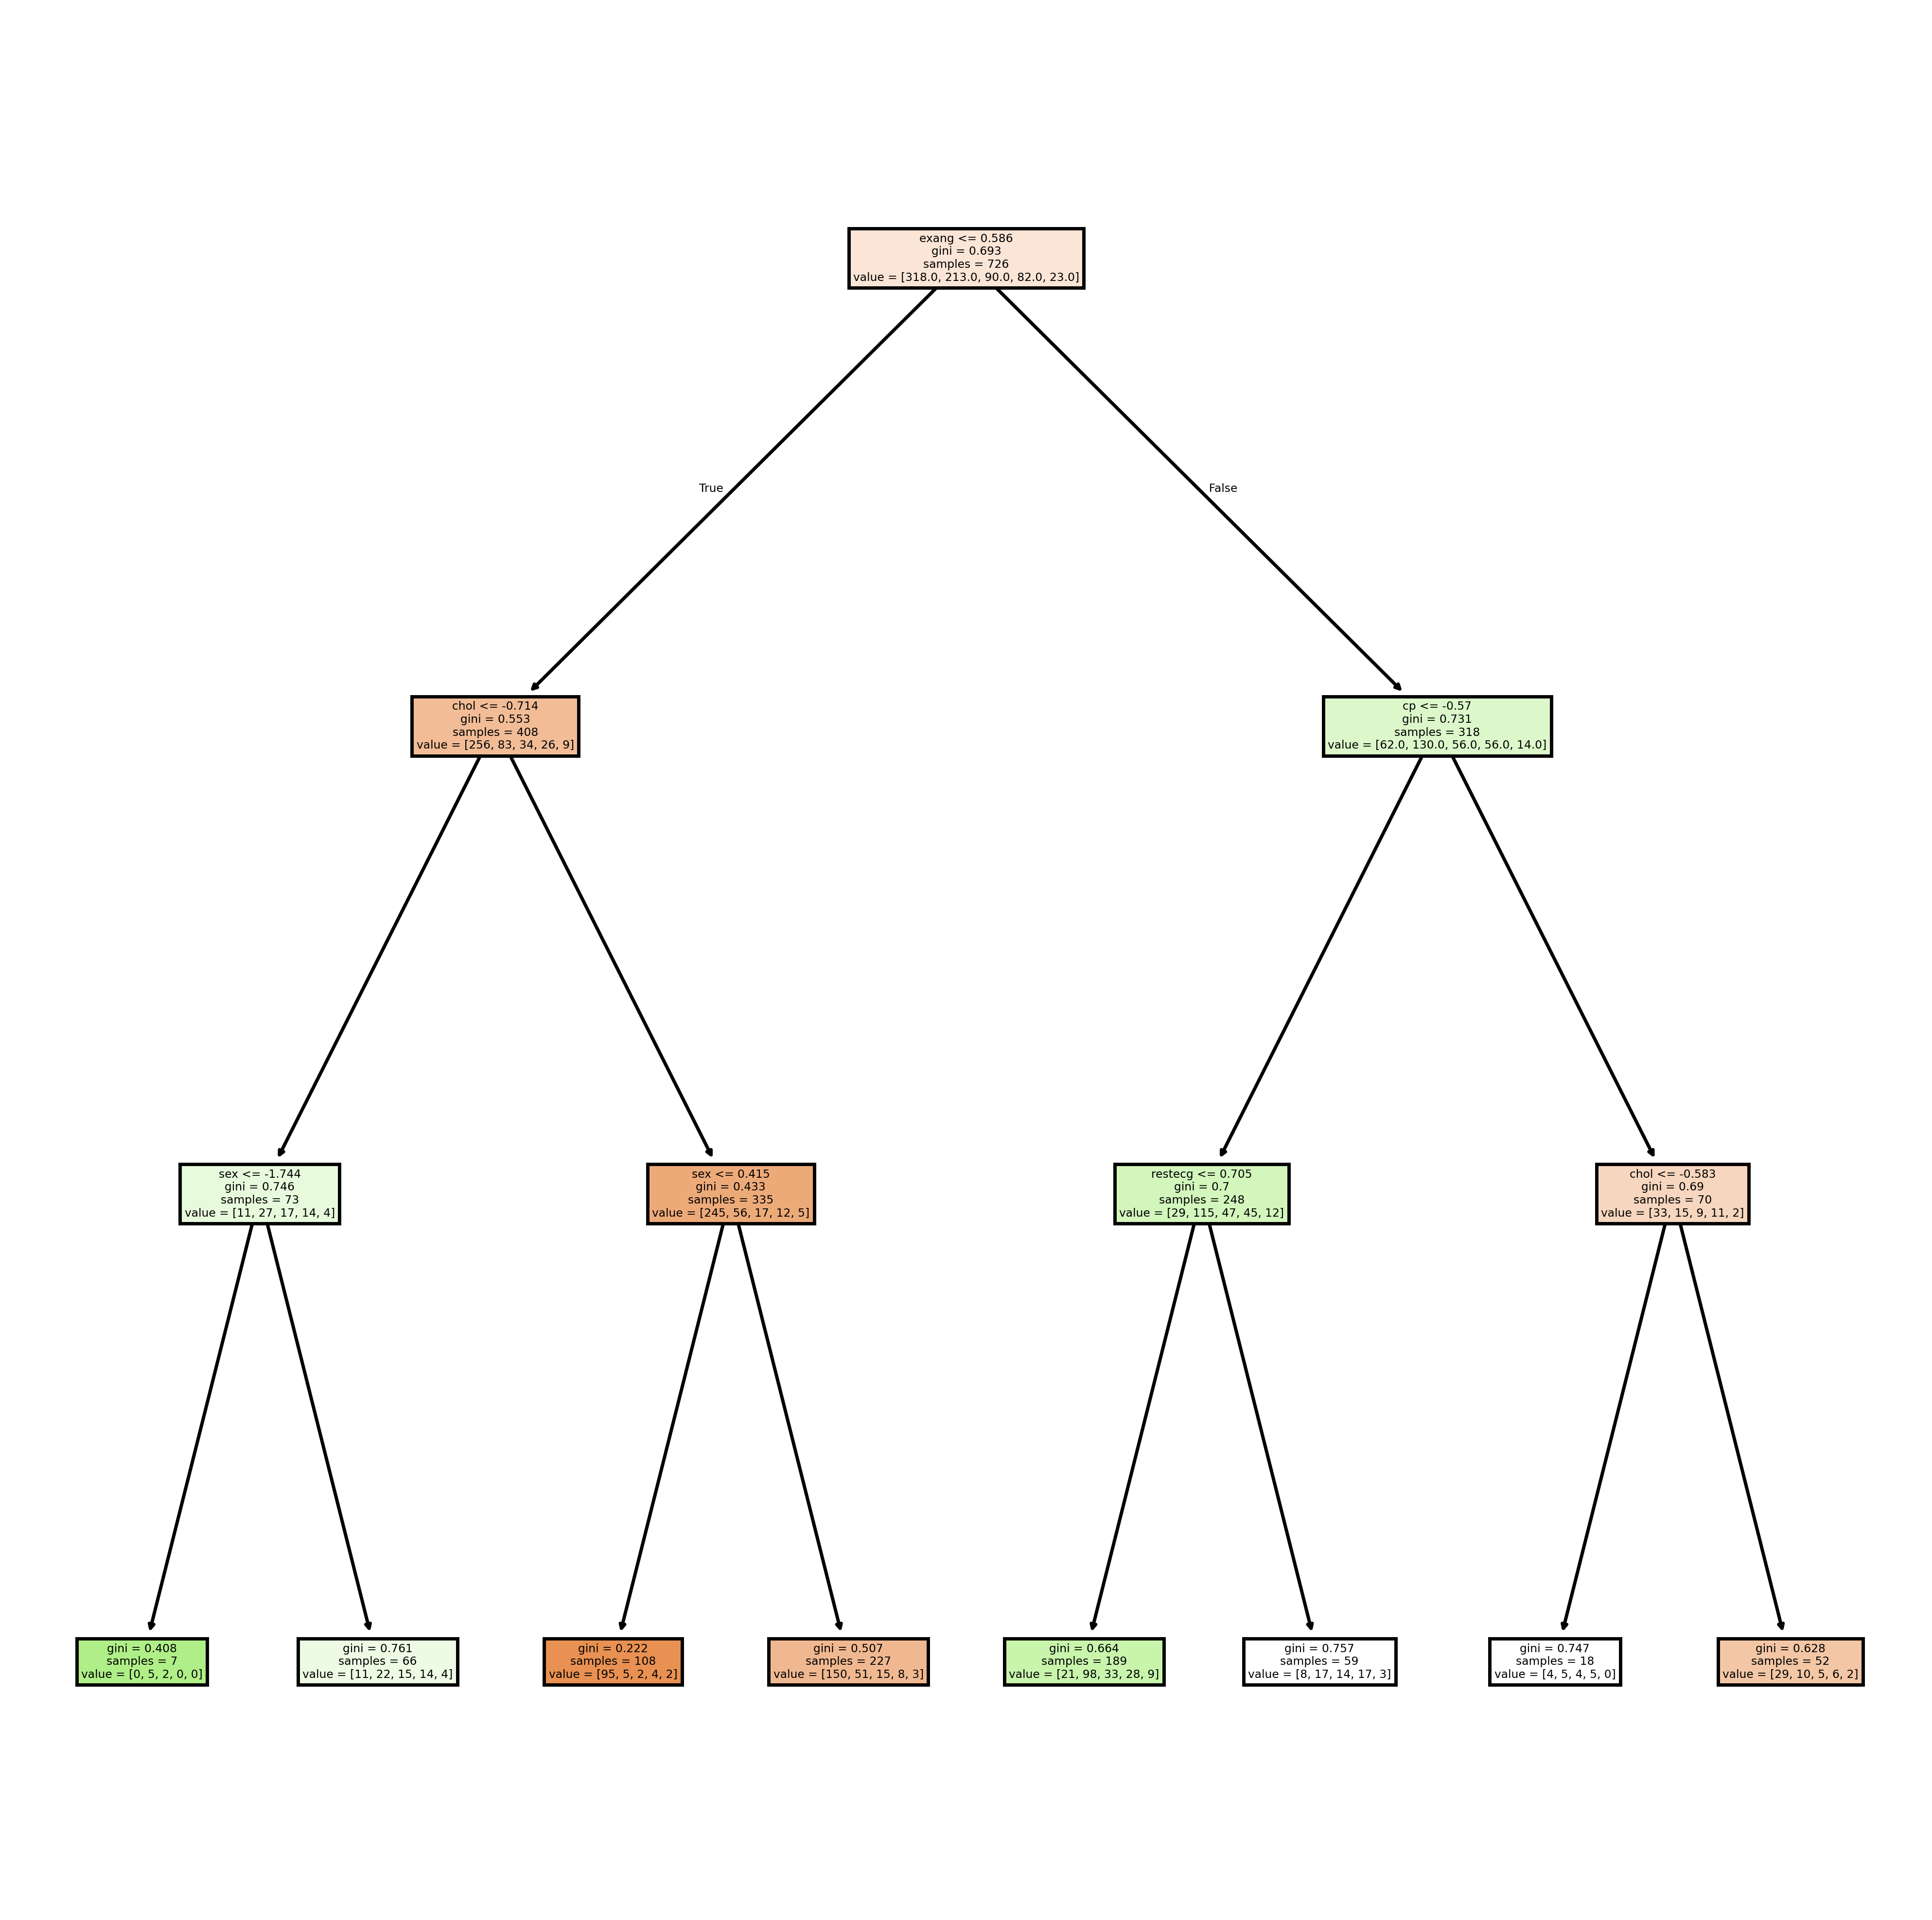

In [91]:
tree.plot_tree(dtc, feature_names=df.columns,filled=True)
plt.show()

## The tree has used column exang to do the first split and then it uses the other features chol, cp, sex to further divide the data ##

 ## Question 1 ##
## Criterion (gini, entropy, log_loss): These determine the metric used to calculate the quality of splits. ##
## Selecting the right criterion gives desired balance between accuracy and speed. ##
## Gini index favors computational efficiency and creates pure nodes. ##
## Entropy is slightly more computationally intense but can lead to more balanced trees. ##

## Max Depth (3, 4, 6, 8): A smaller depth limits the model's capacity to capture complex patterns (can underfit the data). ##
## A greater depth enables capturing intricate patterns but may cause overfitting on the training data, reducing generalization performance. ##

## Splitter (best, random): Best ensures optimal splits at each node by analyzing all possible splits. ##
## This generally yields high accuracy but can be slower. ##
## Random chooses splits randomly, which can introduce diversity but may reduce model accuracy. ##

## Min Samples Split (2, 5, 10): Smaller values (like 2) allow the tree to grow deeper and create detailed splits, potentially overfitting. ##
## Larger values (like 10) restrict splitting, which can lead to simpler, more general trees that avoid overfitting. ##

## Question 2 ## 
## Label Encoding : Each unique category is assigned a number.##
## Output is a single column with integer values.##
## Advantage is it does not increase the number of columns ##
## Imposes an ordinal relationship (e.g., 2 > 1 > 0), which might mislead models that treat higher numbers as more important. ##
## One hot Encoding: Each unique category is represented as a binary vector ##
## Output is multiple new binary columns ##
## Avoids the ordinal assumption, as categories are treated independently.## 
## drawback is it increases the dimensionality of the dataset significantly, especially with many categories. ##